In [20]:
# please note, all tutorial code are running under python3.5.
# If you use the version like python2.7, please modify the code accordingly

# 4 - Regressor example

import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop

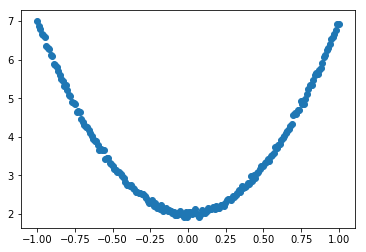

In [92]:
x = np.linspace(-1, 1, 200)
np.random.shuffle(x)    # randomize the data
y = 5 * x ** 2  + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(x, y)
plt.show()

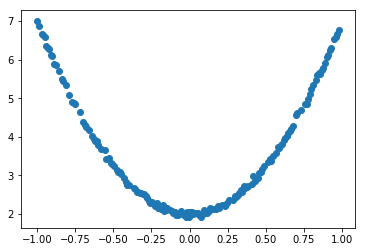

In [93]:
x_train, y_train = x[:160], y[:160]     # first 160 data points
x_test, y_test = x[160:], y[160:]       # last 40 data points
plt.scatter(x_train, y_train)
plt.show()

In [118]:
model = Sequential()
model.add(Dense(units = 200, activation = 'relu', input_dim = 1))
model.add(Dense(units = 1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = RMSprop(), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 201       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [119]:
batch_size = 200
epochs = 50
history = model.fit(x_train, y_train,
                    epochs = epochs,
                    verbose=0,
                    validation_split=0.2)

In [66]:
def plot_history(history, train_metrics, val_metrics, batch_size):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.title('batch_size=' + str(batch_size))

def plot_loss():
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plot_history(history, 'loss','val_loss', batch_size)
    print("loss", np.round(history.history.get('val_loss'), 3))
    plt.subplot(1,2,2)
    plot_history(history, 'acc','val_acc', batch_size)
    print("acc", np.round(history.history.get('val_acc'), 3))  


loss [ 10.615  10.035   9.534   9.077   8.637   8.206   7.783   7.366   6.947
   6.531   6.12    5.714   5.311   4.921   4.54    4.17    3.814   3.481
   3.168   2.869   2.589   2.329   2.09    1.881   1.693   1.534   1.4
   1.291   1.208   1.147   1.106   1.08    1.056   1.03    0.996   0.964
   0.93    0.879   0.832   0.782   0.739   0.691   0.639   0.58    0.53
   0.484   0.443   0.401   0.358   0.312]


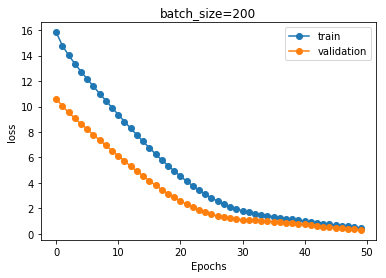

In [120]:
print("loss", np.round(history.history.get('val_loss'), 3))
plot_history(history, 'loss','val_loss', batch_size)


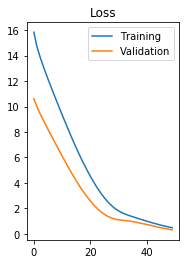

In [121]:
plt.figure(0)
plt.subplot(121)
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')
plt.plot(range(len(loss)), loss, '-', label='Training')
plt.plot(range(len(val_loss)), val_loss, '-', label='Validation')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()
